<img src='for_markdown/1.png'>

<img src='for_markdown/2.png'>

In [86]:
# 그래프를 쥬피터 노트북 안에 그리기 위해 설정
%matplotlib inline

#필요한 패키지와 라이브러리를 가져옴
import numpy as np 
import pandas as pd 
import os #운영체제에서 제공되는 여러 기능 수행 예)파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때

# 시각화 관련 툴
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 

In [87]:
# scikit-learn 
# 정규화
from sklearn.preprocessing import StandardScaler
# 학습, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 혼동 행렬 및 정확도, f1 계산하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [88]:
root_dir = 'Z:/3. 개인백업/이민정/한화교육준비/Data/' #데이터가 있는 폴더 디렉토리
data = pd.read_excel(os.path.join(root_dir,'wdbc_data.xlsx'))

# os.chdir(root_dir)
# data = pd.read_excel('wdbc_data.xlsx')

# os.path.join(), os.chdir(), os.listdir()

# pd.read_csv('~/~.csv')

In [89]:
data.head()
# data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [90]:
# 데이터프레임 shape
print("- Data has {} rows and {} columns.".format(*data.shape))

- Data has 569 rows and 32 columns.


In [91]:
# 10개 변수 값의 Mean값 정보 + id + diagnosis 정보만 사용하여 간단히 분석 실행
data = data.iloc[:,:12]
# data = data.loc[:,['id','diagnosis','radius_mean','texture_mean']]

In [92]:
data.shape

(569, 12)

In [93]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [94]:
data.columns = ['ID','Diagnosis','Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness',\
                'Concavity','Concave points', 'Symmetry', 'Fractal dimension']

In [95]:
# Missing value 확인
# data.isnull()
check_missing = lambda x: x.isnull().sum()
data.apply(check_missing)

ID                   0
Diagnosis            0
Radius               0
Texture              0
Perimeter            0
Area                 0
Smoothness           0
Compactness          0
Concavity            0
Concave points       0
Symmetry             0
Fractal dimension    0
dtype: int64

In [96]:
data.dtypes

ID                     int64
Diagnosis             object
Radius               float64
Texture              float64
Perimeter            float64
Area                 float64
Smoothness           float64
Compactness          float64
Concavity            float64
Concave points       float64
Symmetry             float64
Fractal dimension    float64
dtype: object

In [97]:
# id를 데이터 index로 만들기
data.set_index(['ID'], inplace = True)

In [98]:
data.describe()

Radius     Texture   Perimeter         Area  Smoothness  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

       Compactness   Concavity  Concave points    Symmetry  Fractal dimension  
count   569.000000  569.000000      569.000000  569.000000         569.000000  
mean      0.104341    0.088799        0.048919    0.181162           0.062798  
std       0.052813    0.079720        0.038803    0.027414           0.007060  
min       0.019380    0.000000        0.000000    0.106000           0.049960  
25%       0.064920    0.029560        0.020310    0.161900           0.057700  
50%       0.092630    0.061540        0.033500    0.179200           0.061540  
75%       0.130400    0.130700        0.074000    0.195700           0.066120  
max       0.345400    0.426800        0.201200    0.304000           0.097440

In [99]:
data.to_excel(os.path.join(root_dir,'preprocessed_wdbc_data.xlsx'))

In [100]:
# X와 y 데이터 나누기
y = data['Diagnosis']
# y = data.Diagnosis
X = data.drop(['Diagnosis'],axis=1)

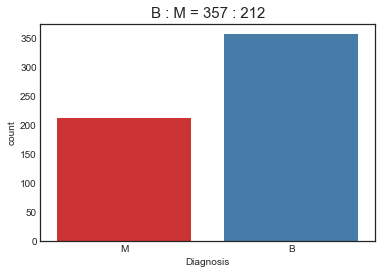

In [101]:
# 양성 클래스와 음성 클래스 갯수 확인 및 시각화
sns.countplot(y, palette='Set1')
#sns.countplot(y) 
plt.title("B : M = {} : {}".format(*y.value_counts()),fontsize=15)
#plt.title("B : M = {} : {}".format(y.value_counts()[0],y.value_counts()[1]),fontsize=15)
plt.show()

In [102]:
# y를 'M':1, 'B':0으로 바꾸기
y = y.map({'M':1,'B':0})
# 보통 binary classification 관심 레이블을 1로 둠

<img src='for_markdown/3.png'>

In [103]:
# 학습 (80%) & 검증 (10%) & 테스트 (10%) 셋으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=2017020558)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    test_size=0.5,
                                                    stratify=y_test,
                                                    shuffle=True,
                                                    random_state=2017020558)

In [116]:
# 임의의 max_depth같도록 의사결정나무분류기 생성
clf_dt = DecisionTreeClassifier(criterion='gini',#'entropy'
                                random_state=2017020558,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1)
# min_samples_split = the number of samples to split (ex) 15
# min_samples_leaf = the number of samples at a leat node (ex) 10
# 학습데이터로 모델 피팅
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2017020558, splitter='best')

In [118]:
# 학습, 검증 데이터 예측
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_train_pred[:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

<img src='for_markdown/4.png'>

<img src='for_markdown/5.png'>

In [113]:
confusion_matrix(y_train,y_train_pred)

array([[277,   8],
       [  6, 164]], dtype=int64)

In [108]:
confusion_matrix(y_valid,y_valid_pred)

array([[32,  4],
       [ 3, 18]], dtype=int64)

In [119]:
# 학습, 검증데이터 범주예측 결과 측정 지표 : 정확도
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
# 학습, 검증데이터 범주예측 결과 측정 지표 : f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

- Accuracy (Train)      : 0.9385
- Accuracy (Validation) : 0.9123
- F1 score (Train)      : 0.9191
- F1 score (Validation) : 0.8837


In [84]:
from IPython.display import Image
from graphviz import Source
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다.
#윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해주면 된다.

<img src='for_markdown/6.png'>

<img src='for_markdown/7.png'>

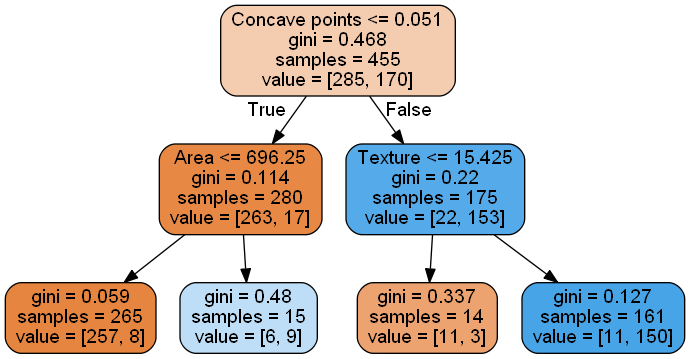

In [117]:
# export_graphviz : 의사결정나무를 DOT format으로 만들기
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,rounded=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))
# pruning이 안된 결과

In [120]:
# 가장 좋은 'max_depth' hyperparameter 값을 찾아보자
max_depths = list(range(1, 11, 1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=2017020558)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred))

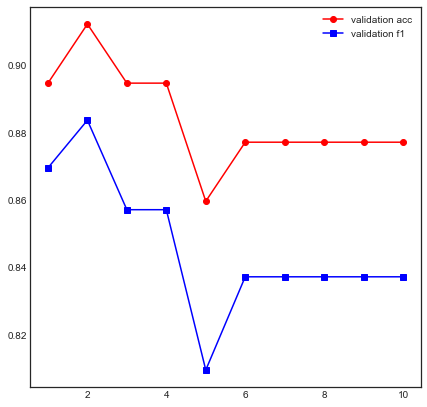

In [126]:
# 가장 좋은 'max_depth' hyperparameter 값 찾기위한 정확도, f1 그래프 그리기
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_accs, color='red', marker='o', label='validation acc')
ax.plot(max_depths, validation_f1, color='blue', marker='s', label='validation f1')
ax.legend(loc='best')
plt.show(fig)

In [128]:
best_model_idx, best_model_f1 = max(enumerate(validation_f1), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.9474
- F1 score (Test) : 0.9268


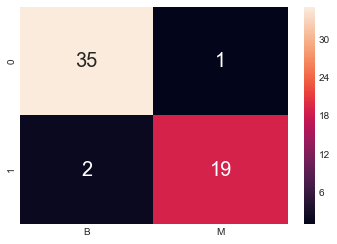

In [129]:
# Confusion matrix 그림 그려보기
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 20})

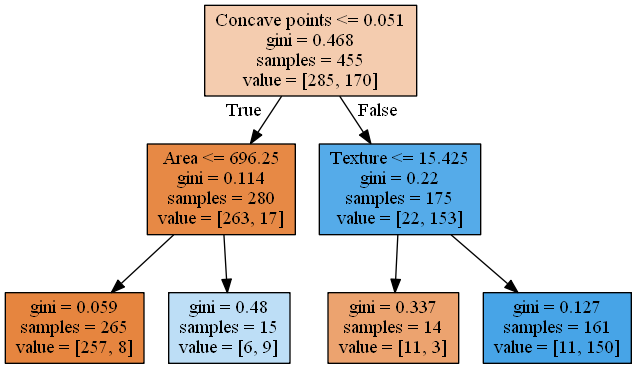

In [130]:
# Visualize the best decision tree model
graph = Source(export_graphviz(dt_models[best_model_idx],
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)

In [133]:
# 이미지 png 파일로 저장하기
with open('Z:/3. 개인백업/이민정/한화교육준비/dt_best.png', 'wb') as f:
    f.write(png_bytes)

In [136]:
imp = dt_models[best_model_idx].feature_importances_

In [137]:
pd.DataFrame([X.columns, imp]).T

0          1
0             Radius          0
1            Texture  0.0803289
2          Perimeter          0
3               Area   0.055858
4         Smoothness          0
5        Compactness          0
6          Concavity          0
7     Concave points   0.863813
8           Symmetry          0
9  Fractal dimension          0

In [138]:
# 변수 중요도 확인해보기
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] != 0])

        variables importance
7  Concave points   0.863813
1         Texture  0.0803289
3            Area   0.055858


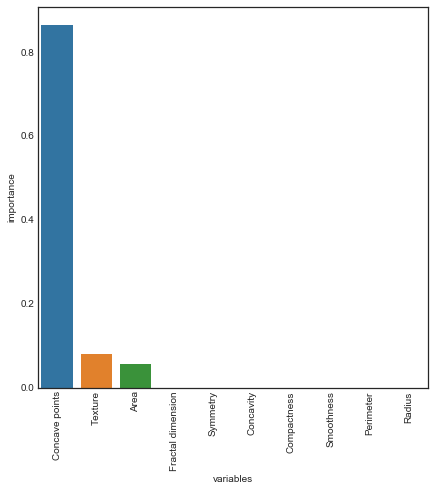

In [140]:
# 변수 중요도 그림 그리기
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90) # set property
plt.show(fig)

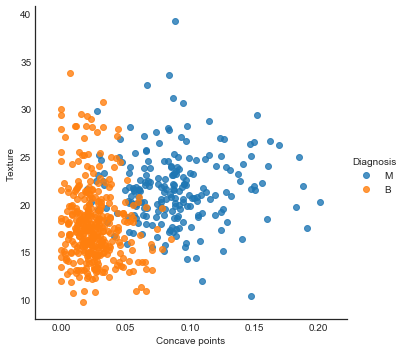

In [142]:
# 가장 중요했던 2가지 변수로 시각화 하기
sns.lmplot(x='Concave points', y='Texture',
           hue='Diagnosis', data=data, fit_reg=False)